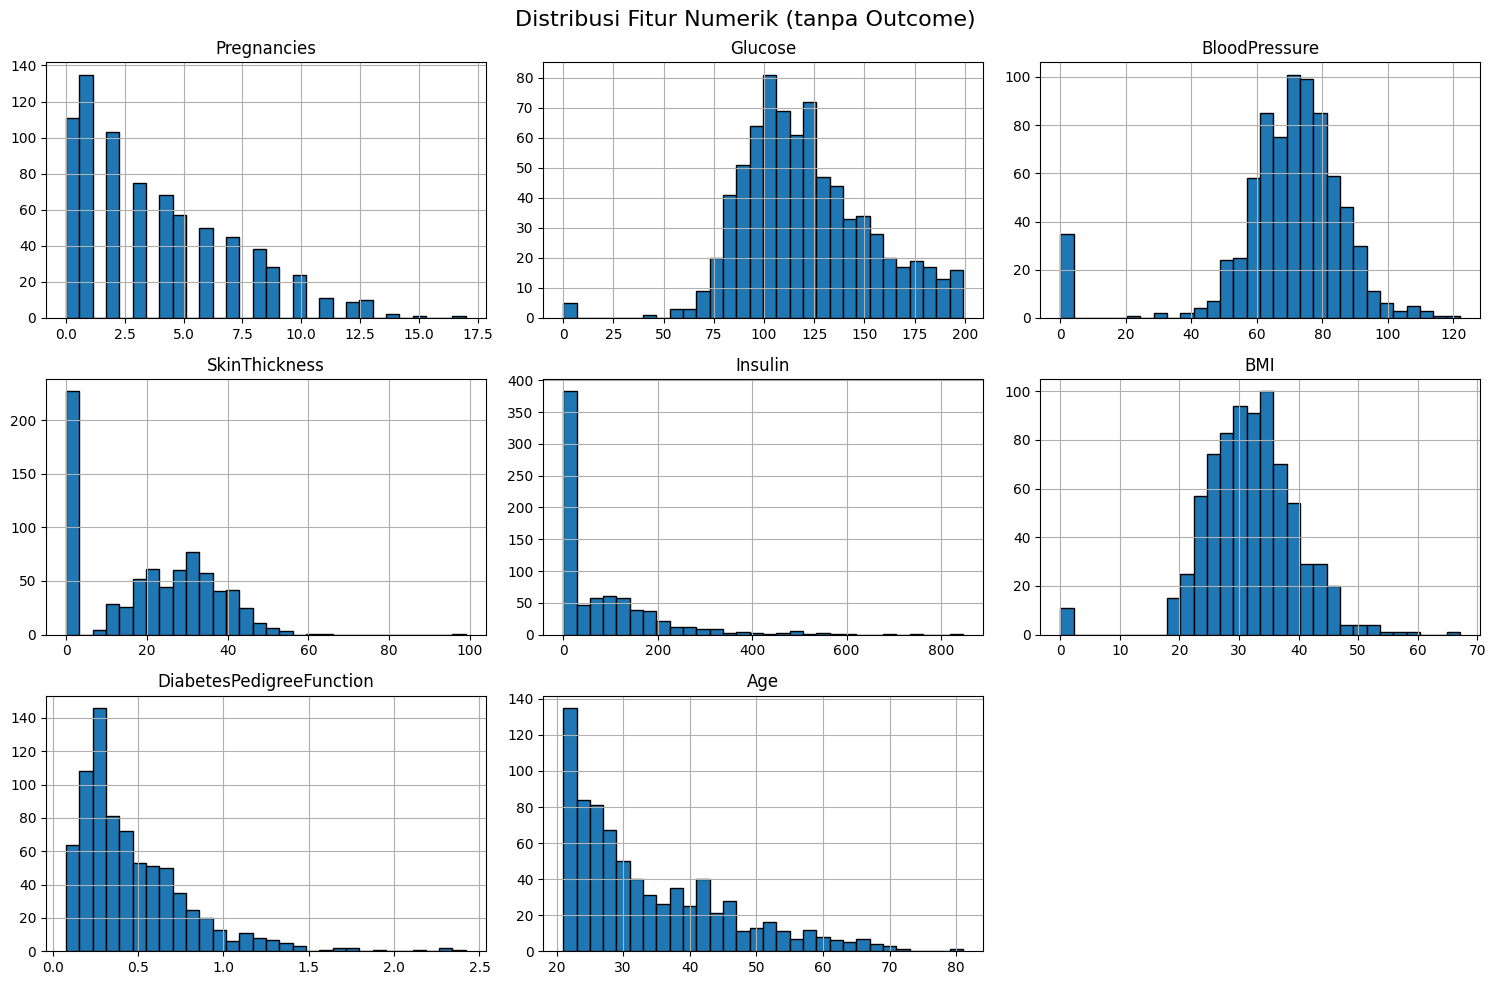

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram untuk semua kolom numerik
data.drop(columns='Outcome').hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribusi Fitur Numerik (tanpa Outcome)', fontsize=16)
plt.tight_layout()
plt.show()


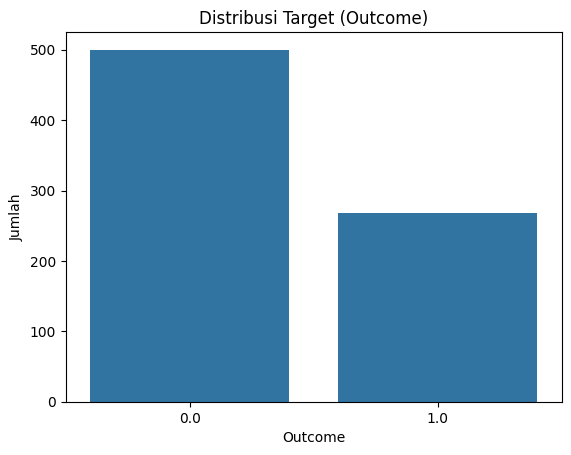

In [41]:
sns.countplot(x='Outcome', data=data)
plt.title('Distribusi Target (Outcome)')
plt.xlabel('Outcome')
plt.ylabel('Jumlah')
plt.show()


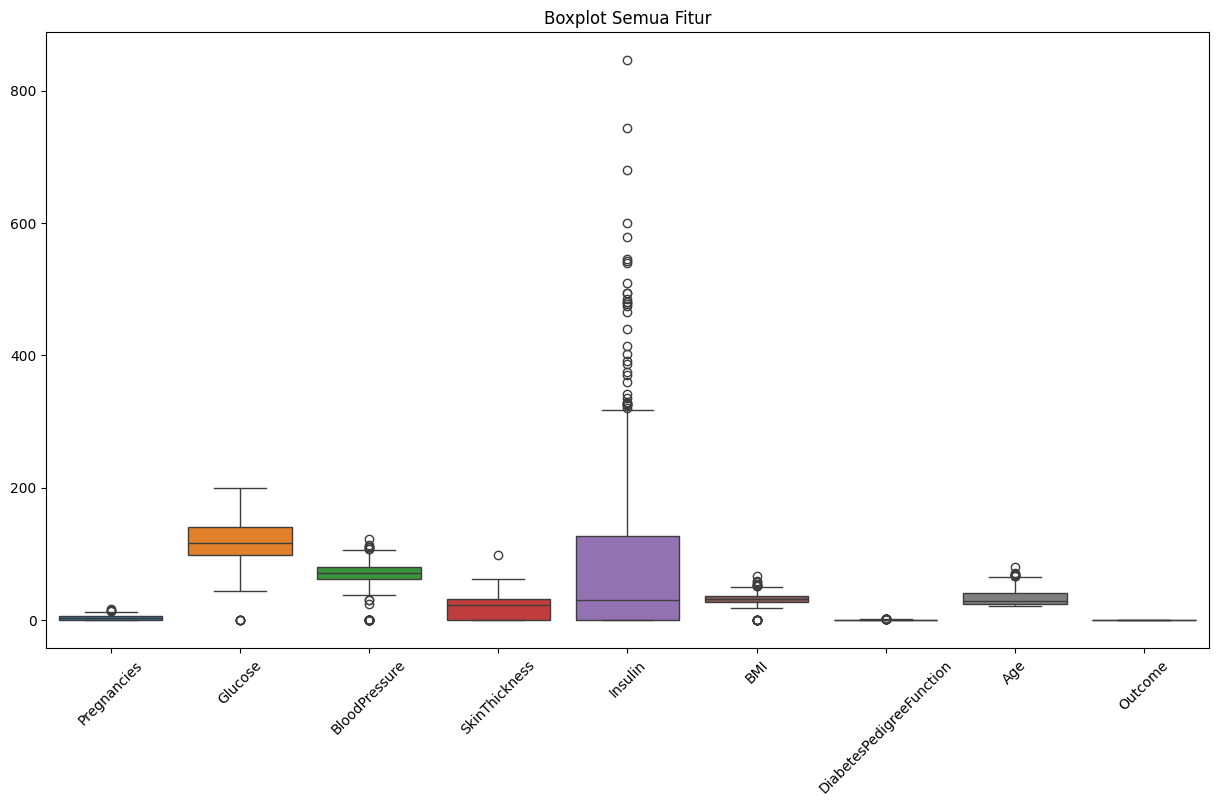

In [42]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("Boxplot Semua Fitur")
plt.show()


# Melihat Korelasi Antar Variabel dengan t-test

In [1]:
import pandas as pd
import numpy as np

# memanggil data dan memberi nama kolom
data = pd.read_csv('pima_indians_diabetes.csv', header = None, names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

data = data.astype(float)

# Drop the missing values
data = data.dropna()


In [2]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [3]:
# variabel prediktor
col = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# variabel target
target_col = data['Outcome']

In [6]:
from scipy.stats import ttest_ind

def uji_ttest_semua_fitur(df, target_col):
    result = []
    # Bagi data ke dua grup berdasarkan target
    grup_0 = df[df[target_col] == 0]
    grup_1 = df[df[target_col] == 1]
    
    for col in df.columns:
        if col != target_col and pd.api.types.is_numeric_dtype(df[col]):
            # Lakukan uji t dua sampel independen
            stat, pval = ttest_ind(grup_0[col], grup_1[col], equal_var=False, nan_policy='omit')
            result.append({
                'Fitur': col,
                'T-Statistic': stat,
                'P-Value': pval,
                'Signifikan (<0.05)': '✅' if pval < 0.05 else '❌'
            })
    
    return pd.DataFrame(result).sort_values(by='P-Value')


In [7]:
hasil_ttest = uji_ttest_semua_fitur(data, target_col='Outcome')
print(hasil_ttest)


                      Fitur  T-Statistic       P-Value Signifikan (<0.05)
1                   Glucose   -13.751537  2.644161e-36                  ✅
5                       BMI    -8.619317  6.566238e-17                  ✅
7                       Age    -6.920738  1.201513e-11                  ✅
0               Pregnancies    -5.906961  6.821926e-09                  ✅
6  DiabetesPedigreeFunction    -4.576812  6.100481e-06                  ✅
4                   Insulin    -3.300895  1.046929e-03                  ✅
3             SkinThickness    -1.970579  4.935586e-02                  ✅
2             BloodPressure    -1.713087  8.735425e-02                  ❌


# Linear Regression

In [23]:
import pandas as pd

# membagi data menjadi train dan test
train_df = data.sample(frac=0.8, random_state=42)  # 80% data train
test_df = data.drop(train_df.index)               # sisanya jadi test


In [33]:
# Ambil fitur dan target
train_input = train_df[['BMI']]  # atau lebih dari 1 kolom
train_output = train_df['Outcome']

test_input = test_df[['BMI']]
test_output = test_df['Outcome']


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_input = pd.DataFrame(scaler.fit_transform(train_input))

In [102]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, train_input) + c 
        return predictions 

    def cost_function(self, predictions, train_output): 
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predictions): 
        derivatives = {} 
        df = (predictions-train_output) 
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        # Initialize random parameters 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss 
        self.loss = [] 

        # Initialize figure and axis for animation 
        fig, ax = plt.subplots() 
        x = train_input.values.flatten()
        x_vals = np.linspace(x.min(), x.max(), 100)

        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', 
                color='green', label='Training Data') 

        # Set y-axis limits to exclude negative values 
        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
            # Forward propagation 
            predictions = self.forward_propagation(train_input) 

            # Cost function 
            cost = self.cost_function(predictions, train_output) 

            # Back propagation 
            derivatives = self.backward_propagation( 
                train_input, train_output, predictions) 

            # Update parameters 
            self.update_parameters(derivatives, learning_rate) 

            # Update the regression line 
            line.set_ydata(self.parameters['m'] 
                        * x_vals + self.parameters['c']) 

            # Append loss and print 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 

            return line, 
        # Create animation 
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 

        # Save the animation as a video file (e.g., MP4) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output')
        plt.yticks(np.arange(0, max(train_output) + 1, 1))
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss 


MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 3.9120413499418016
Iteration = 1, Loss = 3.910121168356308
Iteration = 1, Loss = 3.9082019307336937
Iteration = 1, Loss = 3.906283636609896
Iteration = 2, Loss = 3.904366285521085
Iteration = 3, Loss = 3.9024498770036544
Iteration = 4, Loss = 3.9005344105942306
Iteration = 5, Loss = 3.8986198858296643
Iteration = 6, Loss = 3.896706302247038
Iteration = 7, Loss = 3.8947936593836525
Iteration = 8, Loss = 3.8928819567770483
Iteration = 9, Loss = 3.890971193964987
Iteration = 10, Loss = 3.889061370485454
Iteration = 11, Loss = 3.8871524858766695
Iteration = 12, Loss = 3.8852445396770765
Iteration = 13, Loss = 3.883337531425342
Iteration = 14, Loss = 3.8814314606603677
Iteration = 15, Loss = 3.879526326921275
Iteration = 16, Loss = 3.877622129747411
Iteration = 17, Loss = 3.875718868678357
Iteration = 18, Loss = 3.8738165432539162
Iteration = 19, Loss = 3.8719151530141143
Iteration = 20, Loss = 3.8700146974992147


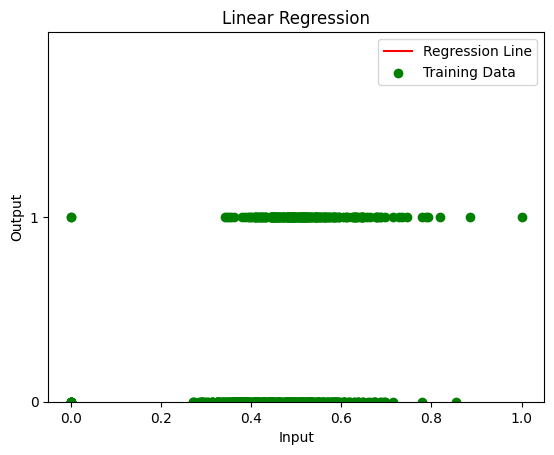

In [103]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)

tidak cocok dengan regresi linear karena outcome berupa biner

# Logistic Regression

In [9]:
import pandas as pd
import numpy as np

data = pd.read_csv('pima_indians_diabetes.csv', header = None, names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

data = data.astype(float)

# Drop the missing values
data = data.dropna()


In [10]:
# membagi data menjadi variabel independen (X) dan dependen (y)
X = data[['Pregnancies', 'Glucose', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

# Standarisasi fitur
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
import numpy as np

# Initialization
learning_rate = 0.1
n_iter = 1000
b = 0
w = np.zeros(X.shape[1])  #an array of weights for each X variables
print(w)

[0. 0. 0. 0. 0. 0. 0.]


In [36]:
# Implement Logistic Regression functions with lambda
predict = lambda x, w, b: np.matmul(w,x.T) + b
sigmoid = lambda yhat: 1/(1+np.exp(-yhat))
loss = lambda y, sigmoid: -(y*np.log(sigmoid)+(1-y)*np.log(1-sigmoid)).mean()
dldw = lambda x, y, sigmoid: (np.reshape(sigmoid-y,(768,1))*x).mean(axis = 0)
dldb = lambda y, sig: (sig-y).mean(axis = 0)
update = lambda a, g, lr: a-(g*lr)

In [37]:
# Training loop
losses = []
for i in range(n_iter):
    yhat = predict(X_scaled, w, b)
    sig = sigmoid(yhat)
    logloss = loss(y, sig)
    losses.append(logloss)
    grad_w = dldw(X_scaled, y, sig)
    grad_b = dldb(y, sig)
    w = update(w, grad_w, learning_rate)
    b = update(b, grad_b, learning_rate)

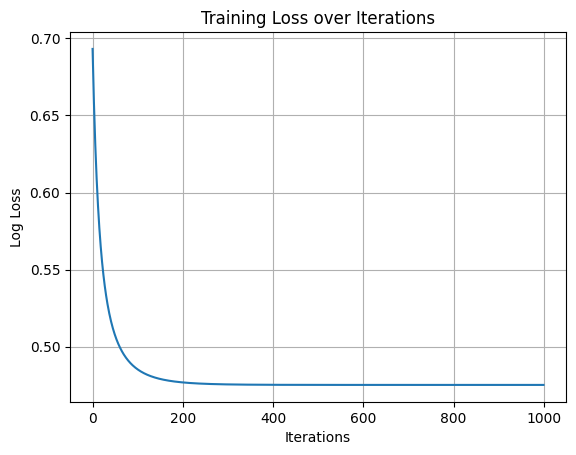

In [38]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Training Loss over Iterations")
plt.grid(True)
plt.show()

In [39]:
from sklearn.metrics import classification_report

yhat = predict(X_scaled, w, b)
sig = sigmoid(yhat)
yhat_class = np.where(sig > 0.5, 1, 0)

print(classification_report(y, yhat_class))

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       500
         1.0       0.74      0.56      0.64       268

    accuracy                           0.78       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768



akurasi regresi logistik 0.78

# KNN

In [17]:
import pandas as pd
import numpy as np

data = pd.read_csv('pima_indians_diabetes.csv', header = None, names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

data = data.astype(float)

# Drop the missing values
data = data.dropna()


In [18]:
# membagi data menjadi variabel independen (X) dan dependen (y)
X = data[['Pregnancies', 'Glucose', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

# Standarisasi fitur
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=21
)

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

def evaluate_k_values(X, y, k_values, folds=5):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    results = {}

    for k in k_values:
        scores = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            y_pred = [classify_point_knn(X_train, y_train, x, k) for x in X_test]
            acc = accuracy_score(y_test, y_pred)
            scores.append(acc)

        mean_acc = np.mean(scores)
        results[k] = mean_acc
        print(f"k={k} → Mean CV Accuracy: {mean_acc:.4f}")

    return results


In [22]:
from collections import Counter

def classify_point_knn(X_train, y_train, x_uji, k):
    # Hitung jarak Euclidean dari x_uji ke semua titik di X_train
    distances = np.linalg.norm(X_train - x_uji, axis=1)
    
    # Ambil k tetangga terdekat
    k_indices = distances.argsort()[:k]
    
    # Ambil label dari k tetangga
    k_labels = y_train[k_indices]
    
    # Voting mayoritas
    most_common = Counter(k_labels).most_common(1)[0][0]
    return most_common


In [23]:
k_range = range(1, 10)
X_np = np.array(X_scaled)  # pastikan array, bukan DataFrame
y_np = np.array(y)

k_results = evaluate_k_values(X_np, y_np, k_range)

# K terbaik
best_k = max(k_results, key=k_results.get)
print(f"\n✅ K terbaik berdasarkan cross-validation: {best_k} (akurasi {k_results[best_k]:.4f})")


k=1 → Mean CV Accuracy: 0.6693
k=2 → Mean CV Accuracy: 0.6693
k=3 → Mean CV Accuracy: 0.7188
k=4 → Mean CV Accuracy: 0.7045
k=5 → Mean CV Accuracy: 0.7124
k=6 → Mean CV Accuracy: 0.7071
k=7 → Mean CV Accuracy: 0.7396
k=8 → Mean CV Accuracy: 0.7305
k=9 → Mean CV Accuracy: 0.7331

✅ K terbaik berdasarkan cross-validation: 7 (akurasi 0.7396)


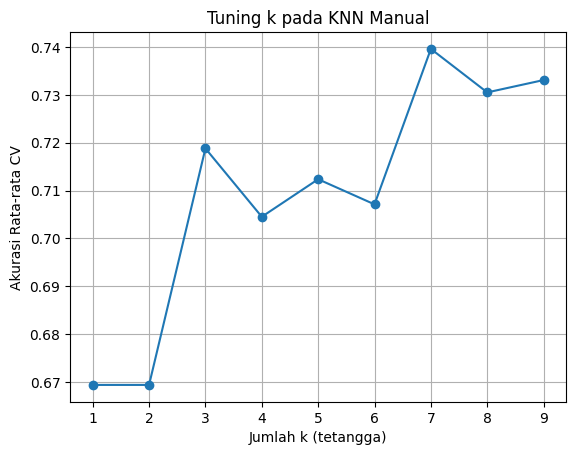

In [24]:
import matplotlib.pyplot as plt

plt.plot(list(k_results.keys()), list(k_results.values()), marker='o')
plt.xlabel("Jumlah k (tetangga)")
plt.ylabel("Akurasi Rata-rata CV")
plt.title("Tuning k pada KNN Manual")
plt.grid(True)
plt.show()


In [59]:
import numpy as np

def classify_point_knn(train_X, train_y, test_point, k=7):
    distances = []

    for i in range(len(train_X)):
        dist = np.linalg.norm(train_X[i] - test_point)
        distances.append((dist, train_y[i]))

    # Ambil k tetangga terdekat
    distances = sorted(distances, key=lambda x: x[0])[:k]

    # Voting
    labels = [int(d[1]) for d in distances]
    return max(set(labels), key=labels.count)


In [60]:
y_pred = []

# Pastikan train_X dan test_X dalam bentuk array
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)
y_train_array = np.array(y_train)

for i in range(len(X_test_array)):
    pred = classify_point_knn(X_train_array, y_train_array, X_test_array[i], k=7)
    y_pred.append(pred)


In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi KNN manual (k=7): {acc:.4f}")

# Laporan lengkap
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Akurasi KNN manual (k=7): 0.7208

Confusion Matrix:
[[84 10]
 [33 27]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.89      0.80        94
         1.0       0.73      0.45      0.56        60

    accuracy                           0.72       154
   macro avg       0.72      0.67      0.68       154
weighted avg       0.72      0.72      0.70       154



akurasi KNN 0.72

Confusion Matrix:
[[84 10]
 [33 27]]


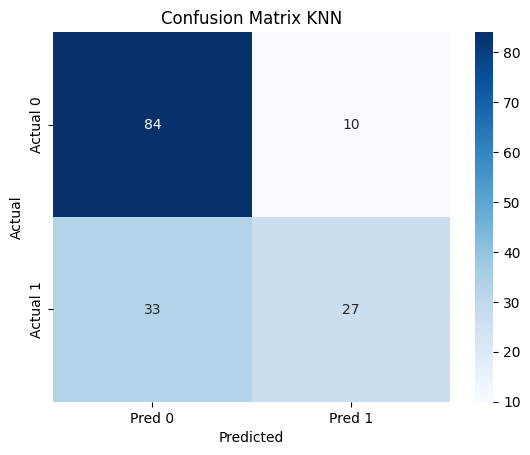

In [62]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

